 <h2 style="text-align: center;">НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ 
 <br/>МОСКОВСКИЙ ЭНЕРГЕТИЧЕСКИЙ ИНСТИТУТ</h2>
 </br>
 <h3 style="text-align: center;">Кафедра Паровых и Газовых Турбин</h3>

 </br>
 </br>
 </br>
 </br>
 </br>

 <h1 style="text-align: center;">Курсовая работа по курсу:</h1>
 <h1 style="text-align: center;">«Паровые и газовые турбины»</h1>

 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: right;">Студент: Каирова Екатерина Андреевна</h5>
 <h5 style="text-align: right;">5 вариант</h5>
 <h5 style="text-align: right;">Группа: ТФэ-01-21</h5>

 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>
 </br>

 <h5 style="text-align: center;">Москва 2024</h5>

 ### $\space$ Дано:
  * $P_0 = 25 \space МПа $ - начальное давление
  * $t_0 = 600 ^\circ C$ -  начальная температура
  * $P_{пп} = 4 \space МПа$ -  давление промперегрева
  * $t_{пп} = 600 ^\circ C$ -  температура промперегрева
  * $P_{к} = 3.5 \space кПа$ -  давление в конденсаторе
  * $t_{п.в.} = 260^\circ C$ -  температура питательной воды

  * $N_{э} = 330 \space МВт$ -  электрическая мощность
  * z = 8 -  число регенеративных подогревателей

In [ ]:
import iapws
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt
import numpy as np


In [34]:
import kr1

 # 1. Построение процесса расширения пара в турбине.
 Определение расходов пара на входе в турбину $G_0$ и в конденсатор $G_к$.

In [37]:
P0 = 25
t0 = 600
Ppp = 4
tpp = 600
Pk = 3.5
tpv = 260
N_e = 330
z = 8
p_feed_water = 1.4 * P0 
internal_efficiency = 0.85
mechanical_efficiency = 0.994
generator_efficiency = 0.99
H_0 = 95
n = 50
ro = 0.05
avg_diameter = 1.1



Dano = kr1.Part_1(P0,t0,Ppp,tpp,Pk,tpv,N_e,internal_efficiency,mechanical_efficiency,generator_efficiency,p_feed_water
            ,n,H_0,ro)

In [38]:
print(Dano.coeff()) #ось абсцисс

0.6713922563894766


In [39]:
#отсюда по оси ординат ниже приведенной зависимости для z = 7
Dano.Graf_coef(0.83) 

0.83

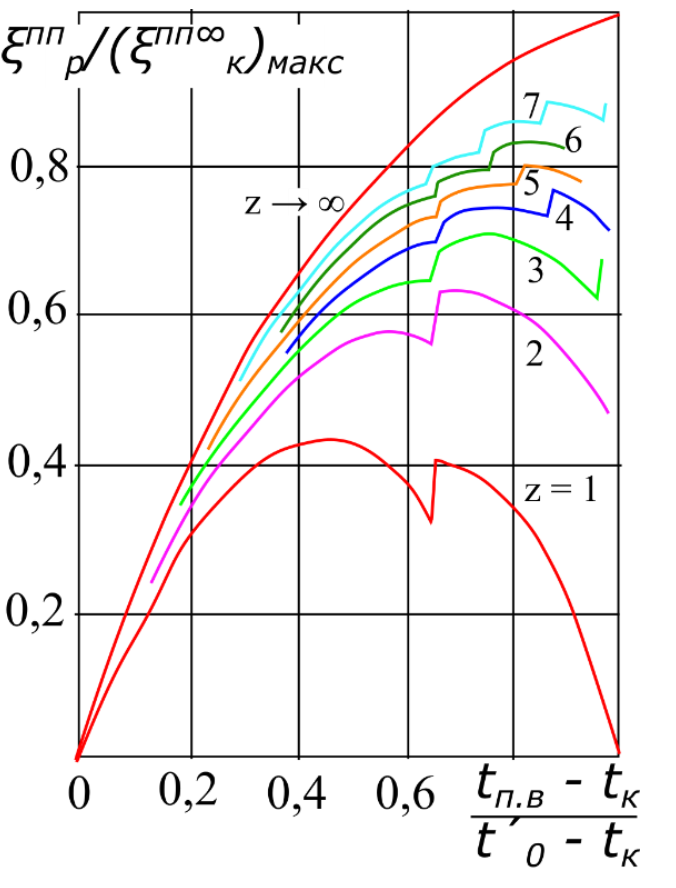

In [40]:
print("Массовый расход в турбину на входе", Dano.inlet_mass_flow())

Массовый расход в турбину на входе 241.36648265117702


In [41]:
print("Массовый расход в конденсатор:", Dano.condenser_mass_flow())

Массовый расход в конденсатор: 165.1918774809524


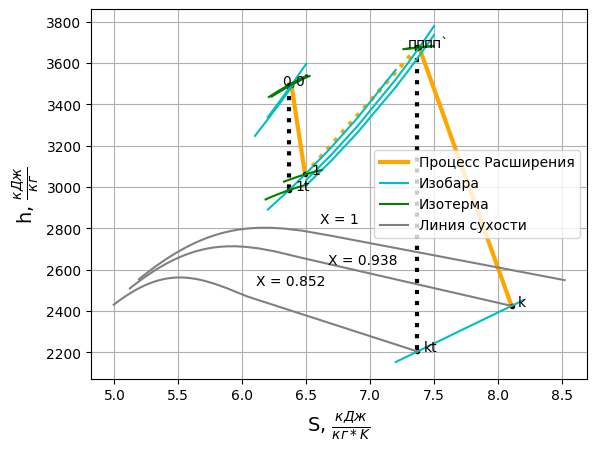

In [42]:
Dano.plot()

 # 2. Проведение расчета регулирующей ступени.
определение зависимости ηол от U/cф. Диапазон варьируемого параметра для дан в задании. Обоснованно выбрать вариант исполнения регулирующей ступени для проектирования ЦВД в рамках заданного диапазона.

In [43]:
#параметры выбранной сопловой решетки С-90-15А      
alpha0 = 90
alpha1_e = 15
t_opt = 0.8
M1t_ = 0.85
b1 = 100
f1 = 3.3
I1_min = 0.36
W1_min = 0.45
Dano.selection_sopl(alpha0,alpha1_e,t_opt,M1t_,b1,f1,I1_min,W1_min)
Dano.avg_diameter_(1.1)

1.1

In [58]:
ksi_noz = 1.98 * 10 **(-2) #коэфф профильных потерь    
ksi_sum = 6.5 * 10 **(-2) #коэфф профильных потерь суммарный

In [59]:
Dano.b_l_and_M1t_nozzle()

(3.659223503145574, 0.6220739910270366)

In [46]:
Dano.nozzle_atlas(ksi_noz,ksi_sum)

In [47]:
Dano.Raboch_Resh()

betta_1 =  25.305517275047976 M2t =  0.4045987047706885


In [48]:
#по полученным параметрам выбирем рабочую лопатку Р-30-21А
beta0 = 25
beta2_e = 21
t_opt = 0.6
M2t_ = 0.9      
b2 = 50
b2_atl = 25.6
f2 = 1.85
I2_min = 0.205
W2_min = 0.234
Dano.selection_working(beta0,beta2_e,t_opt,M2t_,f2,I2_min,W2_min,b2_atl)
Dano.zd_b2(b2)
Dano.proverka_resh()

betta2_e =  21.406627991053053


In [49]:
Dano.b_l_and_M2t_work()

(1.5960060391831383, 0.4045987047706885)

In [50]:
ksi_grid = 5 * 10 **(-2) #коэфф профильных потерь    
ksi_sum_g = 14 * 10 **(-2) #коэфф профильных потерь суммарный
Dano.working_atlas(ksi_grid,ksi_sum_g)

(0.05, 0.14)

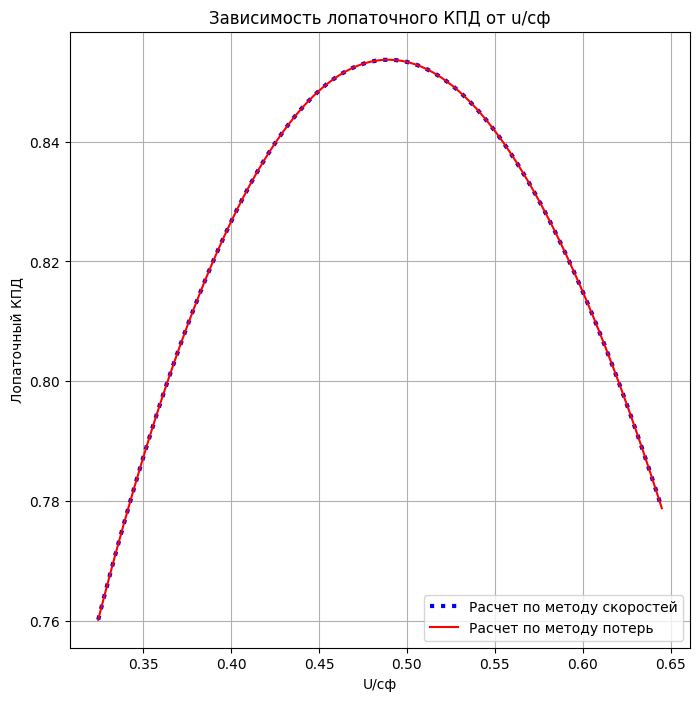

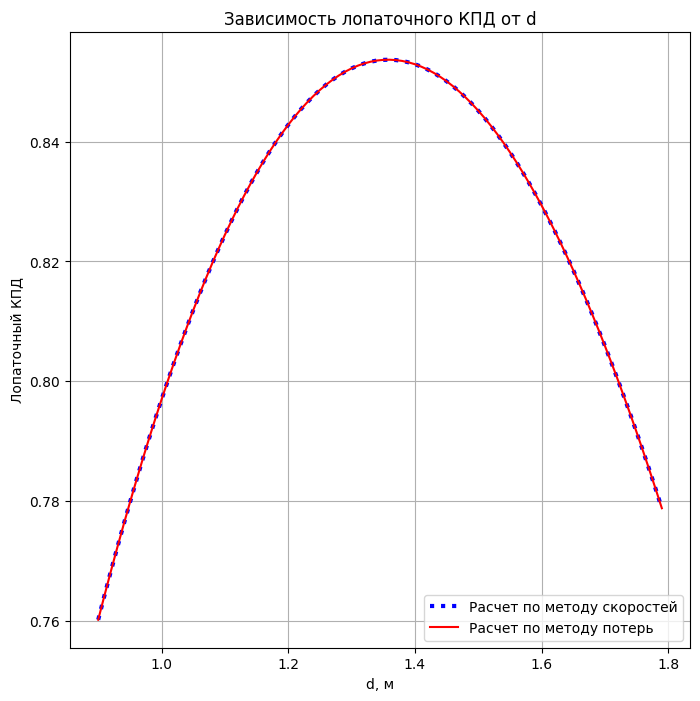

In [51]:
Dano.gr_u_cf()

In [52]:
Dano.delta_graf()
#Из данного диапазона для среднего диаметра [0.9-1.1] по графику наилучший по кпд 1.1
Dano.avg_diameter_(1.1)

Погрешность расчета КПД по разным методам =  -5.702153465331467e-14 %


1.1

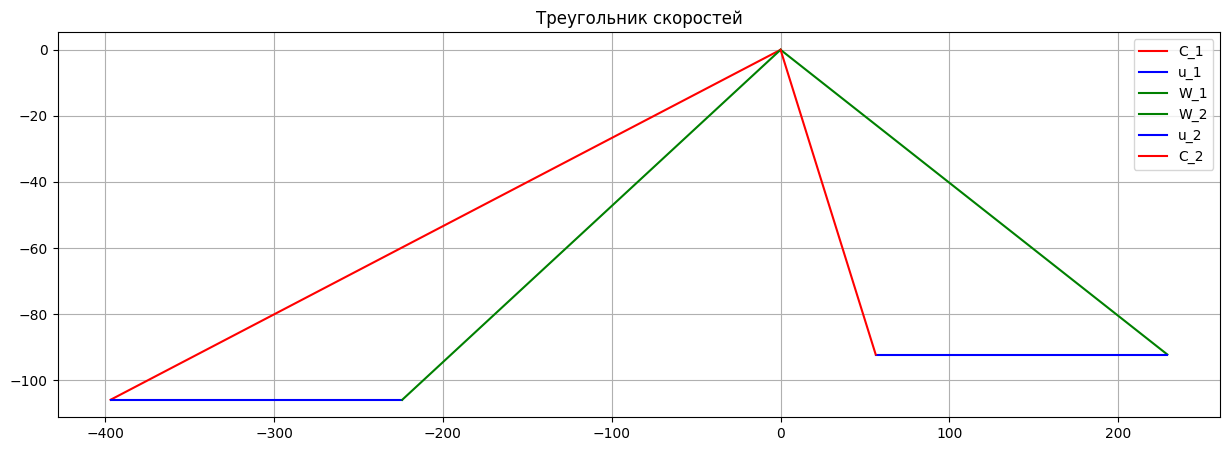

In [53]:
Dano.construction_of_velocity_triangles()

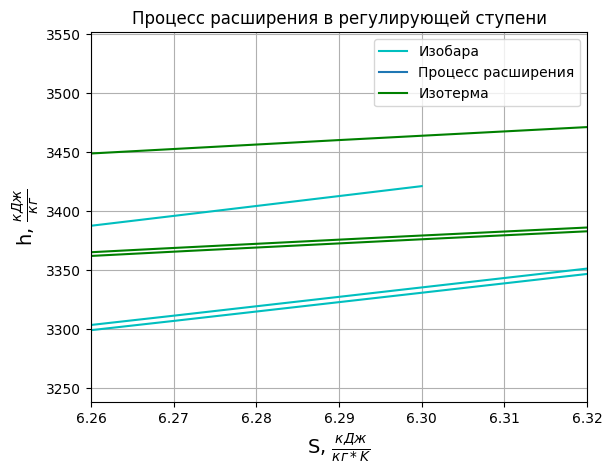

In [54]:
Dano.graf_rash()

In [55]:
Dano.sigma_bend() # < [sigma_bend] = 20 Мпа

19.548453667481766

In [56]:
Dano.for_b2() # размер проходящий по напряжению

49.43234475963305

In [57]:
Dano.sigma_stretch() # < [sigma_stretch] = 450 Мпа

13.26454970757628